In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [10]:
# Data Preparation (MNIST) with shuffled labels
def load_randomized_label_data():
    transform = transforms.ToTensor()
    train_dataset = datasets.MNIST(root='data', train=True, download=True, transform=transform)
    test_dataset = datasets.MNIST(root='data', train=False, download=True, transform=transform)
    
    # Randomize labels for training and testing datasets
    train_dataset.targets = torch.randint(0, 10, (len(train_dataset.targets),))
    test_dataset.targets = torch.randint(0, 10, (len(test_dataset.targets),))
    
    return DataLoader(train_dataset, batch_size=64, shuffle=True), DataLoader(test_dataset, batch_size=64, shuffle=False)

train_loader, test_loader = load_randomized_label_data()

In [11]:
# Neural Network Model with 3 hidden layers, each with 256 nodes
class RandomLabelNetwork(nn.Module):
    def __init__(self):
        super(RandomLabelNetwork, self).__init__()
        self.flatten_input = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 256)
        self.fc_output = nn.Linear(256, 10)

    def forward(self, x):
        x = self.flatten_input(x)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc_output(x)

In [12]:
# Initialize the model, optimizer, and loss function
network_model = RandomLabelNetwork()
network_optimizer = optim.Adam(network_model.parameters(), lr=0.001)
loss_criterion = nn.CrossEntropyLoss()

# Function to perform model training over epochs
def execute_training(loader, model, optimizer, loss_fn):
    model.train()
    cumulative_loss = 0
    for data, labels in loader:
        optimizer.zero_grad()
        predictions = model(data)
        loss = loss_fn(predictions, labels)
        loss.backward()
        optimizer.step()
        cumulative_loss += loss.item()
    avg_epoch_loss = cumulative_loss / len(loader)
    return avg_epoch_loss

In [13]:
# Function to evaluate the model after each epoch
def compute_evaluation_loss(loader, model, loss_fn):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for data, labels in loader:
            predictions = model(data)
            loss = loss_fn(predictions, labels)
            total_loss += loss.item()
        average_loss = total_loss / len(loader)
    return average_loss

In [14]:
# Main loop for training and testing
EPOCH_COUNT = 100
train_loss_history = []
test_loss_history = []

for epoch in range(1, EPOCH_COUNT+1):
    current_train_loss = execute_training(train_loader, network_model, network_optimizer, loss_criterion)
    current_test_loss = compute_evaluation_loss(test_loader, network_model, loss_criterion)
    
    train_loss_history.append(current_train_loss)
    test_loss_history.append(current_test_loss)
    
    
    print(f'Epoch {epoch}/{EPOCH_COUNT}, Train Loss: {current_train_loss:.4f}, Test Loss: {current_test_loss:.4f}')

Epoch 1/100, Train Loss: 2.3033, Test Loss: 2.3030
Epoch 2/100, Train Loss: 2.3029, Test Loss: 2.3027
Epoch 3/100, Train Loss: 2.3029, Test Loss: 2.3032
Epoch 4/100, Train Loss: 2.3027, Test Loss: 2.3026
Epoch 5/100, Train Loss: 2.3027, Test Loss: 2.3033
Epoch 6/100, Train Loss: 2.3020, Test Loss: 2.3058
Epoch 7/100, Train Loss: 2.3013, Test Loss: 2.3053
Epoch 8/100, Train Loss: 2.2997, Test Loss: 2.3059
Epoch 9/100, Train Loss: 2.2969, Test Loss: 2.3111
Epoch 10/100, Train Loss: 2.2936, Test Loss: 2.3121
Epoch 11/100, Train Loss: 2.2884, Test Loss: 2.3150
Epoch 12/100, Train Loss: 2.2817, Test Loss: 2.3274
Epoch 13/100, Train Loss: 2.2726, Test Loss: 2.3337
Epoch 14/100, Train Loss: 2.2603, Test Loss: 2.3447
Epoch 15/100, Train Loss: 2.2470, Test Loss: 2.3572
Epoch 16/100, Train Loss: 2.2291, Test Loss: 2.3743
Epoch 17/100, Train Loss: 2.2107, Test Loss: 2.3840
Epoch 18/100, Train Loss: 2.1892, Test Loss: 2.4131
Epoch 19/100, Train Loss: 2.1636, Test Loss: 2.4436
Epoch 20/100, Train L

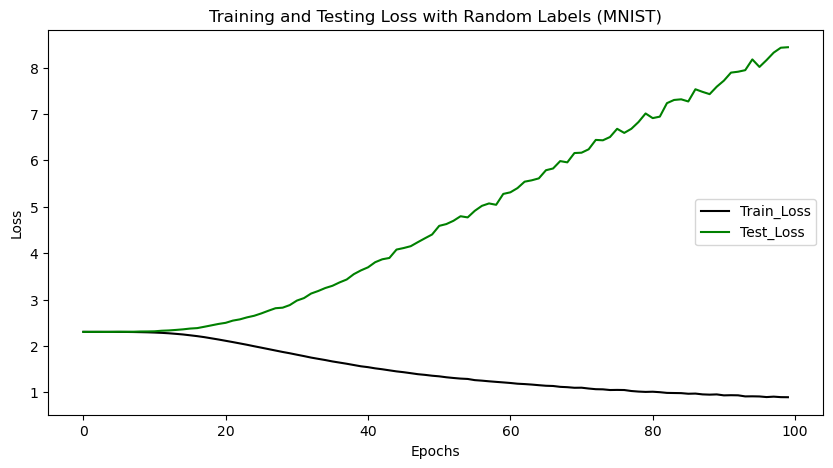

In [16]:
# Visualize Loss similar to the provided image
plt.figure(figsize=(10, 5))  
plt.plot(train_loss_history, label='Train_Loss', color='black')  
plt.plot(test_loss_history, label='Test_Loss', color='green')  

# Setting labels and title
plt.xlabel('Epochs')  
plt.ylabel('Loss')    
plt.title('Training and Testing Loss with Random Labels (MNIST)')
plt.legend(loc='center right')  
plt.show()